In [12]:
import os
import re
import glob
import numpy as np
import gpxpy
import gpxpy.gpx
import filament
import GPX_functions
import gpxpy
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
coast = cfeature.GSHHSFeature(scale="f")
import logging
import hikinggc
from importlib import reload
reload(GPX_functions)

<module 'GPX_functions' from '/home/ctroupin/Projects/Perso/RandoGC/python/GPX_functions.py'>

In [2]:
from matplotlib.font_manager import FontProperties
fawesome = "/home/ctroupin/.fonts/Font Awesome 6 Free-Solid-900.otf"
fp1 = FontProperties(fname=fawesome)
fontfile = "/home/ctroupin/.fonts/D-DIN-Bold.ttf"
myfont = FontProperties(fname=fontfile)
fontfile2 = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont2 = FontProperties(fname=fontfile2)

## Files and directories

In [3]:
figdir = "../figures/TGC"
if not os.path.exists(figdir):
    os.mkdir(figdir)
datafilelist = sorted(glob.glob(os.path.join("../GPX/Races/TGC/", "*.gpx")))

visfile = "/data/Visible/CanaryIslands/GC20221231/5.tif"

In [4]:
placelabels = {"Cruz de Tejeda": (28.005933, -15.599418),
               "Roque Nublo": (27.968332, -15.610662),
               "Arucas": (28.11356822330643, -15.518575250102815),
               "Fagajesto": (28.05787823258515, -15.645223794638907),
               "Tunte": (27.925502, -15.573327),
               "Puerto de las Nieves": (28.102034, -15.710078),
               "Teror": (28.061041, -15.546773),
               "Maspalomas": (27.735080, -15.598714),
               "Ayagaures": (27.851501, -15.607170),
               "Las Palmas\nde Gran Canaria": (28.133707, -15.434640),
               "Artenara": (28.021498, -15.649266),
               "Soria": (27.905832, -15.667758)}
deltax = 0.01

In [5]:
GCisland = hikinggc.Island(bbox=hikinggc.gccoords)
##GC1 = filament.Visible()
#GC1.read_geotiff(visfile1)
#GC2 = filament.Visible()
#GC2.read_geotiff(visfile2)
GC = filament.Visible()
GC.read_geotiff(visfile)

In [7]:
def get_year(filename):
    fname = os.path.basename(filename)
    m = re.search("(\d{4})", fname)
    if m:
        year = m.group(0)
    else:
        year = ''
        
    return year

In [7]:
def add_place_markers():
    for place, coords in placelabels.items():
        t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1, transform=hikinggc.data_crs,
                fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")

        t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])

        #if place == "Artenara":
        t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                        fontproperties=myfont, transform=hikinggc.data_crs,
                        zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
        #else:
       #     t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
       #                 fontproperties=myfont,
       #                 zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])


        t.set_path_effects([path_effects.PathPatchEffect(facecolor="w",
                                                         edgecolor=".1", linewidth=.2)])

## One color by year

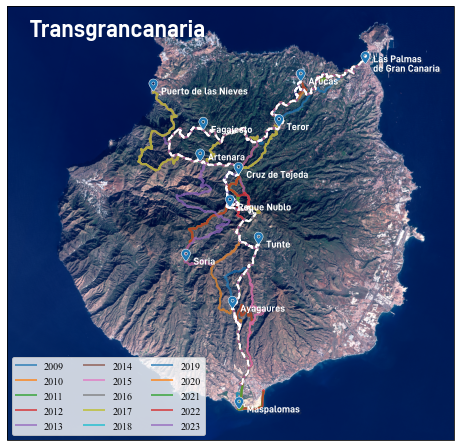

In [39]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=GCisland.proj)
ax.set_extent([-15.9, -15.32, GCisland.bbox[2], GCisland.bbox[3]])
ax.imshow(GC.image, origin='upper', extent=GC.extent, transform=ccrs.epsg(3857), regrid_shape=4000)

add_place_markers()

iii = 0
for df in datafilelist:
    iii += 1
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    if year == "2023":
        lon, lat, ele = GPX_functions.read_gpx_regex(df)
        # ax.plot(lon, lat, "-", lw=4, color="w", zorder=5, alpha=.5, transform=hikinggc.data_crs)
        ax.plot(lon, lat, "--", lw=2, color="w", zorder=7, alpha=1, transform=hikinggc.data_crs)
        
    ax.plot(lon, lat, "-", lw=2, label=year, zorder=6, alpha=.7, transform=hikinggc.data_crs)
    # plt.savefig(os.path.join(figdir, f"test_{iii}.jpg"), dpi=300, bbox_inches="tight")
    

plt.text(0.05, 0.97, 'Transgrancanaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

#ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])


plt.savefig(os.path.join(figdir, "TGC_all010.jpg"), dpi=300, bbox_inches="tight")
plt.legend(loc=3, ncol=3)
plt.savefig(os.path.join(figdir, "TGC_all010_legend.jpg"), dpi=300, bbox_inches="tight")

plt.show()
plt.close()

## All the past years with same color

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=GCisland.proj)
ax.set_extent([-15.9, -15.32, GCisland.bbox[2], GCisland.bbox[3]])
ax.imshow(GC.image, origin='upper', extent=GC.extent, transform=ccrs.epsg(3857), regrid_shape=4000)


add_place_markers()

for iii, df in enumerate(datafilelist[0:-1]):
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)

    if iii == 0:
        ax.plot(lon, lat, "-", lw=.5, color="#FFF792", zorder=6, alpha=.7, transform=hikinggc.data_crs,
                label="2009-2022")
    else:        
        ax.plot(lon, lat, "-", lw=.5, color="#FFF792", zorder=6, alpha=.7, transform=hikinggc.data_crs)

df = datafilelist[-1]
lon, lat, ele = GPX_functions.read_gpx_regex(df)
year = get_year(df)
ax.plot(lon[2:], lat[2:], "-", lw=2, color="r", zorder=7, alpha=.75, label=year, transform=hikinggc.data_crs)

    
plt.legend(loc=3, ncol=1)
plt.text(0.05, 0.97, 'Transgrancanaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

#ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig(os.path.join(figdir, "TGC_all011.jpg"), dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

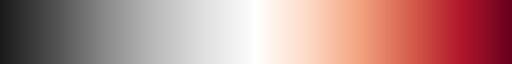

In [20]:
cmap2 = plt.get_cmap(plt.cm.RdGy_r, 4)

## Without satellite image

In [23]:
bounds

array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.])

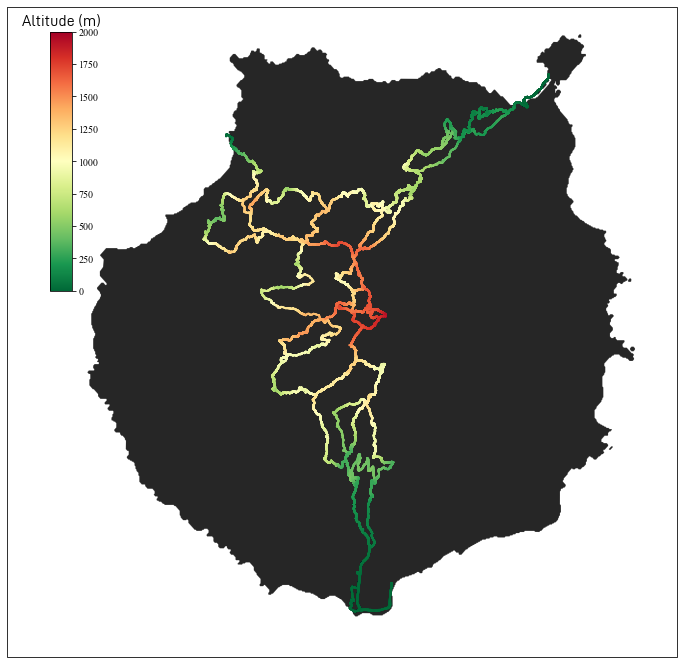

In [32]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=GCisland.proj)
ax.set_extent([-15.9, -15.32, GCisland.bbox[2], GCisland.bbox[3]])


# add_place_markers()
    
cmap = plt.cm.RdYlGn_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=2001., transform=hikinggc.data_crs,
                      zorder=6, cmap=cmap)

fig_coord = [0.175,0.55,0.025,0.3]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="vertical") 
cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
cb.ax.set_title("Altitude (m)", fontproperties=myfont2, color='k', fontsize=16)
ax.add_feature(coast, linewidth=.2, color=".15")
plt.savefig(os.path.join(figdir, "TGC_all013.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [48]:
ele.min()

1.654

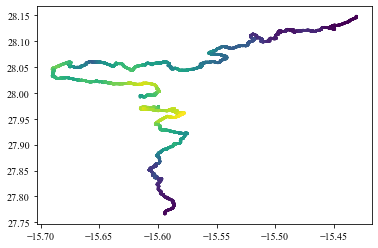

In [45]:
plt.scatter(lon, lat, s=3, c=ele)

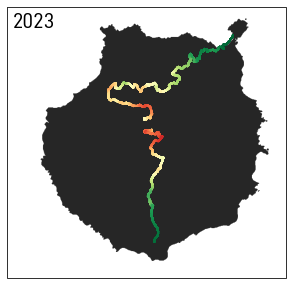

In [43]:
fig = plt.figure(figsize=(20, 20))
    
cmap = plt.cm.RdYlGn_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

iiii = 1
for df in datafilelist[-1:]:
    ax = plt.subplot(4, 4, iiii, projection=GCisland.proj)
    ax.set_extent([-15.9, -15.32, GCisland.bbox[2], GCisland.bbox[3]])
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=2001., transform=hikinggc.data_crs,
                      zorder=6, cmap=cmap)
    ax.add_feature(coast, linewidth=.2, color=".15")
    iiii += 1
    ax.text(.02, 0.98, year, ha="left", va="top", transform=ax.transAxes, fontsize=22, 
            fontproperties=myfont2)

plt.subplots_adjust(wspace=0, hspace=0)
#fig_coord = [0.175,0.55,0.025,0.3]
#cbar_ax = fig.add_axes(fig_coord)
#cb = plt.colorbar(scat, cax=cbar_ax, orientation="vertical") 
#cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
cb.ax.set_title("Altitude (m)", fontproperties=myfont2, color='k', fontsize=16)
#plt.savefig(os.path.join(figdir, "TGC_all014.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Other races in Gran Canaria

In [ ]:
racedir = "../../RandoGC/GPX/Races/"
racefilelist = sorted(glob.glob(os.path.join(racedir, "*.gpx")))
racefilelist

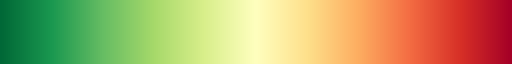

In [31]:
cmap.N = 256
cmap.

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)


for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
    
    #if place == "Artenara":
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    #else:
   #     t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
   #                 fontproperties=myfont,
   #                 zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
            
    t.set_path_effects([path_effects.PathPatchEffect(facecolor="w",
                                                     edgecolor=".1", linewidth=.2)])

for iii, df in enumerate(racefilelist):
    # print(f"Working on file {df}")
    lon, lat = GPX_functions.read_gpx_latlon(df)

    ax.plot(lon, lat, "-", lw=1.5, zorder=6, alpha=.7)

for iii, df in enumerate(datafilelist):
    # print(f"Working on file {df}")
    lon, lat = GPX_functions.read_gpx_latlon(df)

    ax.plot(lon, lat, "-", lw=1.5, zorder=6, alpha=.7)


plt.text(0.05, 0.97, 'Trail running races in Gran Canaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

plt.savefig(os.path.join(figdir, "GC_races5.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Bar plots (distance and elevation)

In [49]:
distance2Dlist = []
distance3Dlist = []
uphilllist = []
for datafile in datafilelist:
    gpx_file = open(datafile)
    gpx = gpxpy.parse(gpx_file)
    d2d = gpx.length_2d()
    d3d = gpx.length_3d()
    dplus, dminus = gpx.get_uphill_downhill()
    uphilllist.append(dplus)
    distance2Dlist.append(d2d / 1000.)
    distance3Dlist.append(d3d / 1000.)

In [54]:
distance3Dlist

[114.28860569310748,
 114.74086598876771,
 124.32689110407186,
 125.06221652842866,
 123.8505426145333,
 128.9000807499632,
 118.58895819590657,
 125.72043502556839,
 124.04767779012175,
 127.88886852328227,
 126.90317544745994,
 128.10734001999384,
 132.12391654353954,
 127.9257046051814,
 127.83421468197594]

In [50]:
yearlist = [get_year(datafile) for datafile in datafilelist]

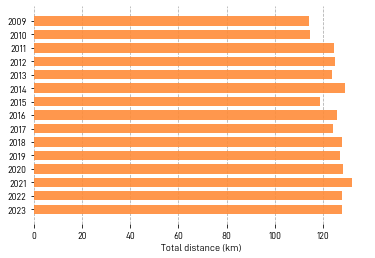

In [51]:
fig, ax = plt.subplots()

y_pos = np.arange(len(distance2Dlist))

ax.barh(y_pos, distance3Dlist, align='center', zorder=4, color="#FF8C39", alpha=.9, height=.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(yearlist, fontsize=20)
ax.invert_yaxis()  

for tick in ax.get_xticklabels():
    tick.set_font_properties(myfont2)
for tick in ax.get_yticklabels():
    tick.set_font_properties(myfont2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(zorder=2, linestyle="--", axis="x")

ax.set_xlabel('Total distance (km)', fontproperties=myfont2)
# plt.savefig(os.path.join(figdir, "TGC_dist.jpg"), dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
fig, ax = plt.subplots()

y_pos = np.arange(len(distance2Dlist))

ax.barh(y_pos, uphilllist, align='center', zorder=4, color="#FF8C39", alpha=.9, height=.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(yearlist, fontsize=20)
ax.invert_yaxis()  

for tick in ax.get_xticklabels():
    tick.set_font_properties(myfont2)
for tick in ax.get_yticklabels():
    tick.set_font_properties(myfont2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(zorder=2, linestyle="--", axis="x")

ax.set_xlabel('Total uphill (m)', fontproperties=myfont2)
plt.savefig(os.path.join(figdir, "TGC_uphill.jpg"), dpi=300, bbox_inches="tight")

plt.show()